In [2]:
#####################################################################
# Script Name	 : "Fallstudie_Verbrauch_Elektogeraete.ipynb"                                                                                         
# Description	 : Dataset from swiss open data gov, in which we will explore the sales and consumption of electrical appliances in Switzerland
# Args           : 
# Author       	 : Marc Kressig
# Email          : marc.kressig@ost.ch
# Date           : 21.10.2025
#####################################################################

Für die Datenanalyse habe ich den Datensatz „ogd109_absatz_verbrauch_elektrogeraete“ aus dem Open Government Data (OGD) Portal der Schweiz ausgewählt. Der Datensatz enthält Informationen zum Absatz und Verbrauch von Elektrogeräten in der Schweiz und zeigt, wie sich diese Kennzahlne über verschiedene Jahre und Gerätekategorien hinweg entwickeln.

Für mich besonders interessant, sind die Einblicke in das Konsumverhalten, Nachhaltigkeit wie auch die technologischen Entwicklungen, die es über die Jahre hinweg gegeben hat.

In [3]:
# import section
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [4]:
# Datenset als grt hineinladen
grt = pd.read_csv('C:\\Users\\marck\\Documents\\_OST\\DAANA\\DAANA\\own_case\\ogd109_absatz_verbrauch_elektrogeraete.csv').dropna()
display(grt.head())

print('Überpüfe den Datensatz auf fehlende Werte')
print(grt.isnull().sum())
print()
print('Anzahl der NA-Werte im Datensatz')
print(grt.isnull().sum().sum())
print()


,Jahr,Quelle,Geraetekategorie,Neugeraeteabsatz_Stk,Geraetebestand_Stk,Verbrauch_Neugeraete_kWh,Verbrauch_Geraetebestand_kWh
0,2002,FEA,Elektroherde und Einbaubacköfen,268400.0,2907854.0,93030925.0,1.327149e+09
1,2002,FEA,Geschirrspüler,159274.0,1751301.0,36970000.0,5.040957e+08
2,2002,FEA,Kühlschränke,257100.0,3959165.0,72752000.0,1.212396e+09
3,2002,FEA,Tiefkühlschränke,82700.0,1163988.0,25260000.0,3.667851e+08
4,2002,FEA,Wäschetrockner,79146.0,1056823.0,42260000.0,6.440320e+08


Überpüfe den Datensatz auf fehlende Werte
Jahr                            0
Quelle                          0
Geraetekategorie                0
Neugeraeteabsatz_Stk            0
Geraetebestand_Stk              0
Verbrauch_Neugeraete_kWh        0
Verbrauch_Geraetebestand_kWh    0
dtype: int64

Anzahl der NA-Werte im Datensatz
0



Anzahl verschieden Jahre: 20



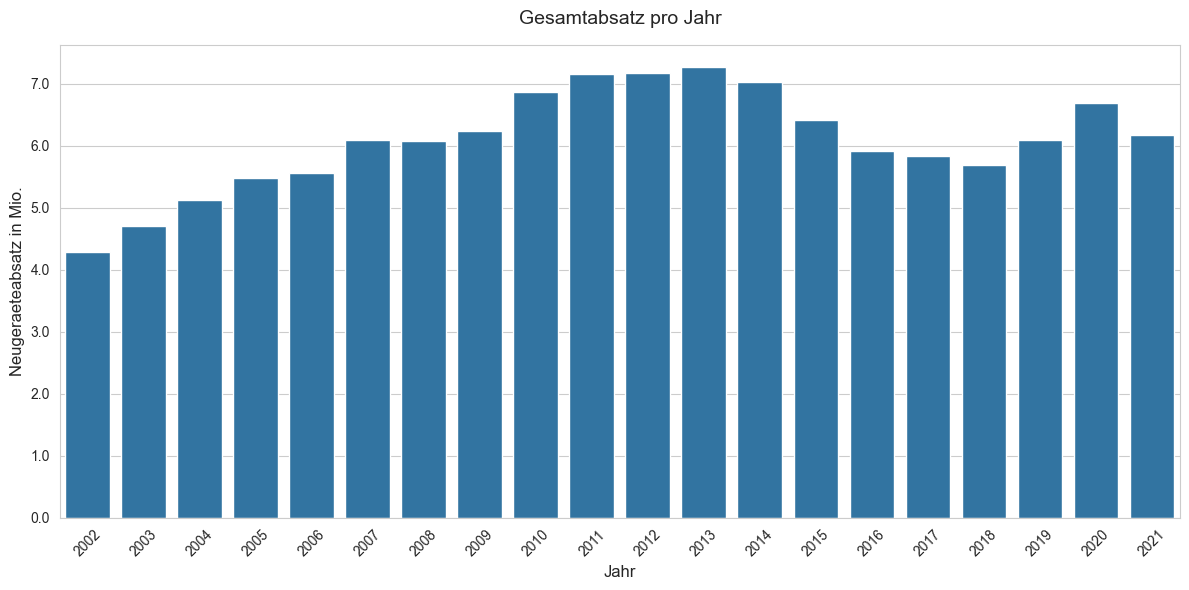

In [24]:
# Anzahl der verschiedenen Jahre im Datensatz
n_years = grt["Jahr"].nunique()

print(f'Anzahl verschieden Jahre: {n_years}')
# print('Jahre im Datensatz:', years)
print()

# Plot
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grt,
    x='Jahr',
    y='Neugeraeteabsatz_Stk',
    estimator=sum,
    errorbar=None) # confidence intervall

# customize plot
plt.title('Gesamtabsatz pro Jahr', fontsize=14, pad=15)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Neugeraeteabsatz in Mio.', fontsize=12)
plt.xticks(rotation=45)

def millions_formatter(x, pos):
    return f'{x/1000000:.1f}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

<Figure size 3000x700 with 0 Axes>

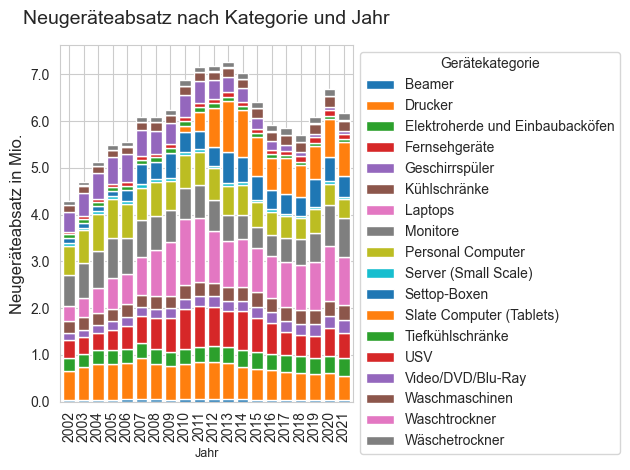

In [ ]:
# Plot: Neugeräteabsatz nach Kategorie und Jahr
plt.figure(figsize=(30, 7))
sales_by_category = grt.pivot_table(
    values='Neugeraeteabsatz_Stk',
    index='Jahr',
    columns='Geraetekategorie',
    aggfunc='sum'
)

ax = sales_by_category.plot(
    kind='bar',
    stacked=True,
    width=0.8
)

# Customize plot
plt.title('Neugeräteabsatz nach Kategorie und Jahr', fontsize=14, pad=15)
plt.xlabel('Jahr', fontsize=9)
plt.xticks(rotation=90)
plt.ylabel('Neugeräteabsatz in Mio.', fontsize=12)
plt.legend(title='Gerätekategorie', bbox_to_anchor=(1.0, 1), loc='upper left')

# Format y-axis to show values in millions
def millions_formatter(x, pos):
    return f'{x/1000000:.1f}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

plt.tight_layout()
# plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the plot area to leave space for legend
plt.show()

In [ ]:
# In welchen Regionen kommen welche Geräte vor

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>